In [41]:
import cv2
import PIL
import numpy as np
import tensorflow as tf

from PIL import Image

# convert tenfsor data to image array
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)

# resize image array and padding
def resize_and_pad(image_array, target_size=[224, 224]):
    image = tf.image.resize_with_pad(image_array, # image array
                                     target_height=target_size[0], target_width=target_size[1]) # image size target
    image = tensor_to_image(image)
    return image

# resize image with and padding
def crop_and_pad(image_path, target_size=[224, 224]):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
#     image = Image.open(image_path)
#     image = crop_image(image, *box) # crop with bbox
    image = resize_and_pad(image / 255, target_size)
    return image

In [18]:
image = crop_and_pad('./1_datasets/try_padding_dataset/original/train/Hitech/[S1]Hitech_030_f0.jpg', target_size=[1024, 1024])
# image = Image.open("./1_datasets/original_dataset/new/ArtDecor/4-Interior-Decoration_ew.jpg")
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(image)
plt.show()

NameError: name 'crop_and_pad' is not defined

In [67]:
import os
from shutil import copyfile

src_dir = './1_datasets/original_dataset/'
des_dir = './1_datasets/try_padding_dataset/original/'
labels = os.listdir('./1_datasets/original_dataset/train/')
labels.sort()


max_pad = 3
new_copy = False

if new_copy:
    for folder in os.listdir(src_dir):
        folder_dir = os.path.join(src_dir, folder)
        #
        for label in os.listdir(folder_dir):
            num = 1
            label_dir = os.path.join(folder_dir, label)
            #
            for image_name in os.listdir(label_dir):
                image_path = os.path.join(label_dir, image_name)
                image = Image.open(image_path)
                ratio = max(image.size)/min(image.size)
                if(ratio > 1.75):
                    ori_name = image_name
    #                 new_name = '{}_{}{}'.format(label, (str(num)).zfill(max_pad), os.path.splitext(image_name)[1])
    #                 print('File copy: {} => {}'.format(ori_name, new_name))
                    src = image_path
                    if(not os.path.exists(os.path.join(des_dir, folder, label))):
                        os.mkdir(os.path.join(des_dir, folder, label))
                    des = os.path.join(des_dir, folder, label, image_name)

                    # Copy file
    #                 copyfile(src, des)
                    num += 1
                    #

In [7]:
import os
from shutil import copyfile

src_dir = './1_datasets/try_padding_dataset/original/'
des_dir = './1_datasets/try_padding_dataset/padding/'
labels = os.listdir('./1_datasets/original_dataset/train/')
labels.sort()


max_pad = 3

for folder in os.listdir(src_dir):
    folder_dir = os.path.join(src_dir, folder)
    #
    for label in os.listdir(folder_dir):
        num = 1
        label_dir = os.path.join(folder_dir, label)
        #
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            
            new_name = '{}_{}{}'.format(label, (str(num)).zfill(max_pad), os.path.splitext(image_name)[1])
            if(not os.path.exists(os.path.join(des_dir, folder, label))):
                os.mkdir(os.path.join(des_dir, folder, label))
            des = os.path.join(des_dir, folder, label, new_name)

            # padding
            image = crop_and_pad(image_path)

            # save to file
            image.save(des)
            num += 1
            #

In [17]:
import os
import random
import numpy as np
from os import path
from tqdm import tqdm
from PIL import Image, ImageOps
from matplotlib.pyplot import imshow
%matplotlib inline


In [30]:
target_size = 224
# original_path = 'C:\\Users\\Tran Minh Hieu\\Documents\\GitHub\\DeepLearning_InteriorDesignDataset\\v1.0\\'
# resize_path = 'D:\\Desktop\\Results_Crop\\'
# list_folder = os.listdir(original_path)

def customize_size(original_size, target_size):
    ratio = 1
    width, height = original_size
    ratio = (width / target_size) if (width < height) else (height / target_size)    
    return int(width / ratio), int(height / ratio)

def random_crop(folder, image_path, resize_path): # jumps is the number of pixels 
    img = Image.open(image_path)
    img = img.convert('RGB')
    img = img.resize(customize_size(img.size, target_size))
    x_max, y_max = np.array(img.size) - target_size
    
    try:        
        resize_path = '{}/{}/'.format(resize_path, folder)
        if path.exists(resize_path) == False:
            os.mkdir(resize_path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)

    i = 0
    for random_x in range(0, x_max + 1, 100):
        for random_y in range(0, y_max + 1, 100):
            area = (random_x, random_y, random_x + target_size, random_y + target_size)
            c_img = img.crop(area)
            
            fit_img_h = ImageOps.fit(c_img, (target_size, target_size), Image.ANTIALIAS)
            filename, ext = os.path.splitext(os.path.basename(image_path))
            filename = '{}_{}{}'.format(filename, i, ext)
            path_save = os.path.join(resize_path, str(i))
            if path.exists(path_save) == False: 
                os.mkdir(path_save)
            i = i + 1
            fit_img_h.save(os.path.join(path_save, filename))

In [14]:
original_path = './1_datasets/try_padding_dataset/original/val/'
resize_path = './1_datasets/try_padding_dataset/cropping/val/'
list_folder = os.listdir(original_path)

if path.exists(resize_path) == False: 
    os.mkdir(resize_path)
fail = []
for folder in (list_folder):
    folder_path = os.path.join(original_path, folder)
    image_paths = os.listdir(folder_path)
    for image_path in (image_paths):
        try:
            random_crop(folder, os.path.join(folder_path, image_path), resize_path)
        except OSError:
            fail.append(os.path.join(folder_path, image_path))
        else:
            fail.append(os.path.join(folder_path, image_path))

Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory

Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory <module 'ntpath' from 'c:\\users\\tranm\\appdata\\local\\programs\\python\\python38\\lib\\ntpath.py'> 
Successfully created the directory

(1582, 687)


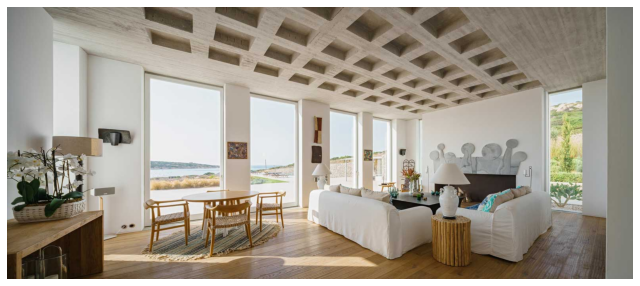

In [62]:
image_path = './1_datasets/try_padding_dataset/original/train/Hitech/[S1]Hitech_030_f0.jpg'
image = Image.open(image_path)
image = image.convert('RGB')
# image = image.resize((1024, 1024))

print(image.size)

# image = crop_and_pad('./1_datasets/try_padding_dataset/original/train/Hitech/[S1]Hitech_031_40.jpg', target_size=[1024, 1024])
# image = Image.open("./1_datasets/original_dataset/new/ArtDecor/4-Interior-Decoration_ew.jpg")
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.axis('off')
plt.imshow(image)
plt.show()

In [2]:
A1 = 0.98
A2 = 0.9884
A3 = 0.9856
A4 = 0.9364
A5 = 0.9448

result_3 = (A1 + A2 + A3) \
- (A1*A2 + A1*A3 + A2*A3) \
+ (A1*A2*A3)
print('3 model: {}'.format(result_3))

result_5 = (A1 + A2 + A3 + A4 + A5) \
- (A1*A2 + A1*A3 + A1*A4 + A1*A5 + A2*A3 + A2*A4 + A2*A5 + A3*A4 + A3*A5 + A4*A5) \
+ (A1*A2*A3 + A1*A2*A4 + A1*A2*A5 + A1*A3*A4 + A1*A3*A5 + A1*A4*A5 + A2*A3*A4 + A2*A3*A5 + A2*A4*A5 + A3*A4*A5) \
- (A1*A2*A3*A4 + A1*A2*A3*A5 + A1*A2*A4*A5 + A1*A3*A4*A5 + A2*A3*A4*A5) \
+ (A1*A2*A3*A4*A5)
print('5 model: {}'.format(result_5))

3 model: 0.9999966591999995
5 model: 0.9999999882713881


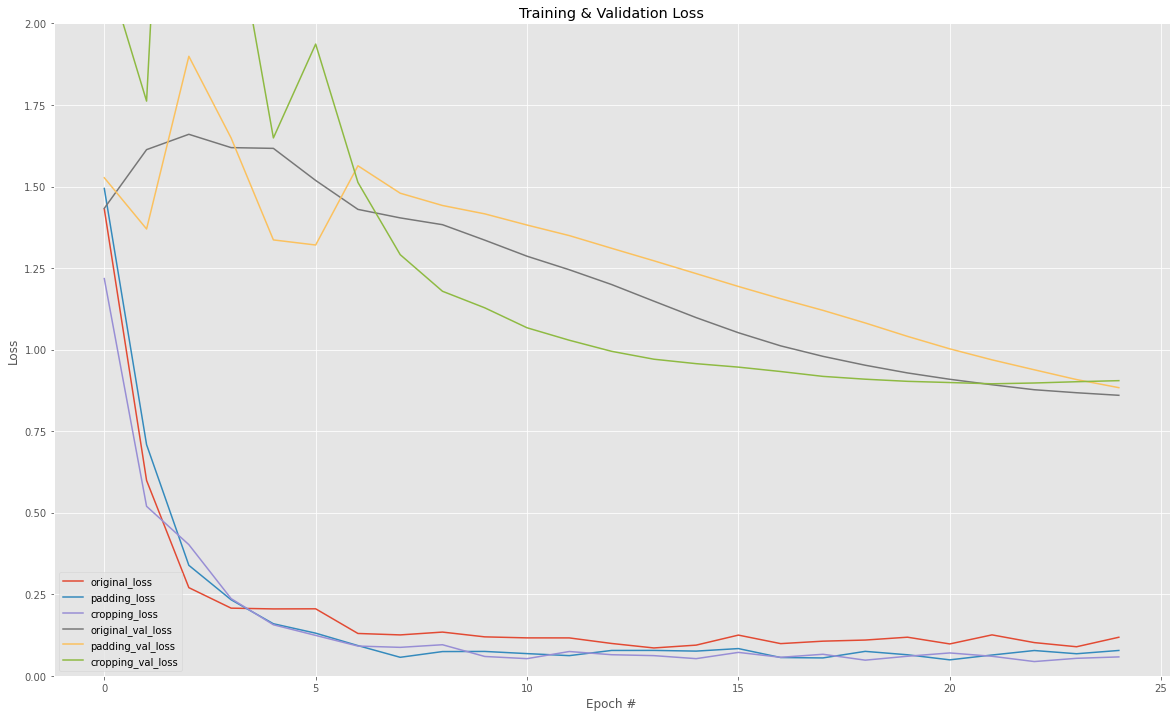

In [37]:
# Load the dictionary back from the pickle file.
import os
import pickle
import matplotlib.pyplot as plt

history_original = pickle.load(open('./6_try_padding/result/original/history.pickle', "rb" ))
history_padding = pickle.load(open('./6_try_padding/result/padding/history.pickle', "rb" ))
history_cropping = pickle.load(open('./6_try_padding/result/cropping/history.pickle', "rb" ))

epochs_ = len(history_original["loss"])
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.plot(np.arange(0, epochs_), history_original["loss"], label="original_loss")
plt.plot(np.arange(0, epochs_), history_padding["loss"], label="padding_loss")
plt.plot(np.arange(0, epochs_), history_cropping["loss"], label="cropping_loss")
plt.plot(np.arange(0, epochs_), history_original["val_loss"], label="original_val_loss")
plt.plot(np.arange(0, epochs_), history_padding["val_loss"], label="padding_val_loss")
plt.plot(np.arange(0, epochs_), history_cropping["val_loss"], label="cropping_val_loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.ylim(0, 2)
plt.show()

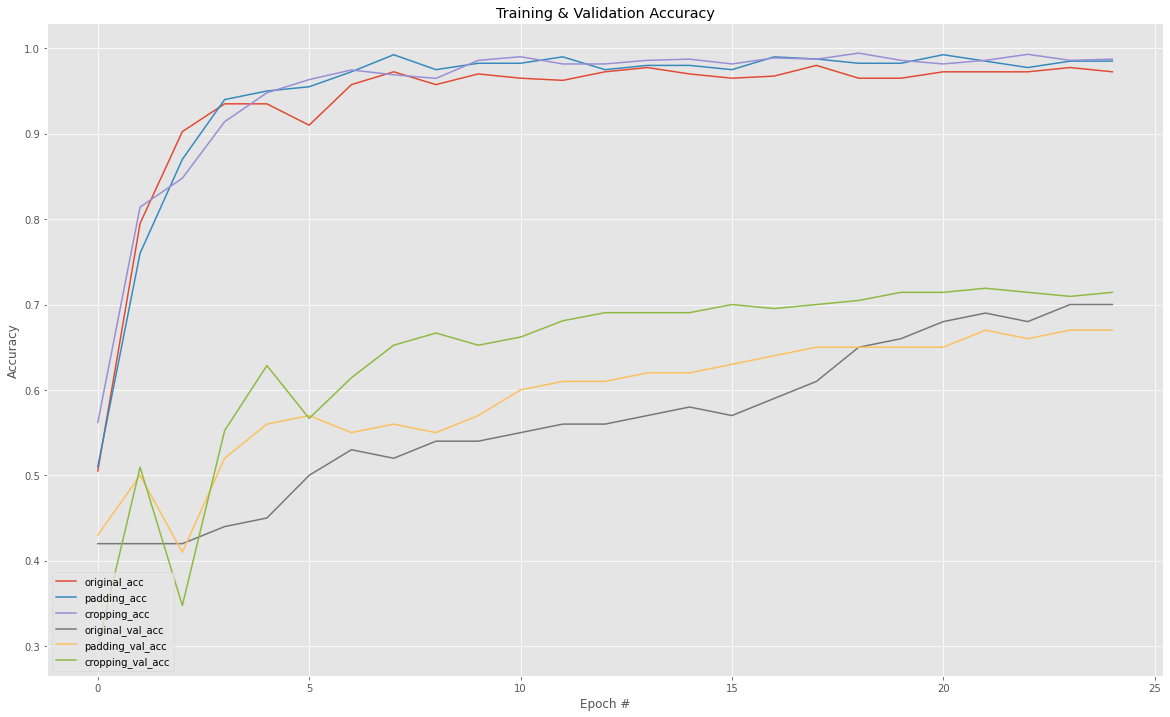

In [36]:
epochs_ = len(history["loss"])
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.plot(np.arange(0, epochs_), history_original["accuracy"], label="original_acc")
plt.plot(np.arange(0, epochs_), history_padding["accuracy"], label="padding_acc")
plt.plot(np.arange(0, epochs_), history_cropping["accuracy"], label="cropping_acc")
plt.plot(np.arange(0, epochs_), history_original["val_accuracy"], label="original_val_acc")
plt.plot(np.arange(0, epochs_), history_padding["val_accuracy"], label="padding_val_acc")
plt.plot(np.arange(0, epochs_), history_cropping["val_accuracy"], label="cropping_val_acc")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [22]:
import os
import math
import random
import numpy as np
from os import path
from tqdm import tqdm
from PIL import Image, ImageOps
from matplotlib.pyplot import imshow
from matplotlib.patches import Rectangle
%matplotlib inline

target_size = 224

def get_image_from_url(url):
    return io.imread(url)

def customize_size(original_size, target_size):
    ratio = 1
    width, height = original_size
    ratio = (width / target_size) if (width < height) else (height / target_size)    
    return math.ceil(width / ratio), math.ceil(height / ratio)

def gen_step(size, target_size): # size >= target_size
    frac, whole = math.modf(size / target_size) # get frac and whole
    if frac > 0.2: whole += 1 # if frac > 0.2 => increase whole
    # return result
    return int(whole)

def crop_image(image, area):
    c_img = image.crop(area) # crop image with area
    # return with fit image
    return ImageOps.fit(c_img, (target_size, target_size), Image.ANTIALIAS)

def data_processing_for_api(image_path, target_size=224):
    # images
    images = np.empty((0, target_size, target_size, 3), dtype='float32')
    
    # get image
#     image = get_image_from_url(image_url)
#     image = Image.fromarray(image.astype('uint8'), 'RGB')
    image = Image.open(image_path)
    image = image.convert('RGB')
    
    # get size to resize
    w, h = customize_size(image.size, target_size)
    
    # resize image
    image = image.resize((w, h))
    # get the number of images that can be taken in rows and columns
    noCol = gen_step(w, target_size)
    noRow = gen_step(h, target_size)

    if noCol==1 and noRow==1: # if can get only 1 image, crop the image in the center

        # get position crop
        x_ = (w - target_size) // 2
        y_ = (h - target_size) // 2

        # crop image
        area = (x_, y_, x_ + target_size, y_ + target_size)
        croped_image = crop_image(image, area)
        croped_image = np.array(croped_image) / 255
        croped_image = croped_image.reshape(1, target_size, target_size, 3).astype(np.float32)
        
        # add to array
        images = np.append(images, croped_image, axis=0)

    else: # if can get multi image 
        # get step and position max for crop
        x_max, y_max = np.array((w, h)) - target_size # get max position
        # get step
        stepCol = (x_max // (noCol - 1)) if (noCol > 1) else 1
        stepRow = (y_max // (noRow - 1)) if (noRow > 1) else 1

        for random_x in range(0, x_max + 1, stepCol):
            for random_y in range(0, y_max + 1, stepRow):
                # crop image
                area = (random_x, random_y, random_x + target_size, random_y + target_size)
                croped_image = crop_image(image, area)
                croped_image = np.array(croped_image) / 255
                croped_image = croped_image.reshape(-1, target_size, target_size, 3).astype(np.float32)
                # add to array
                images = np.append(images, croped_image, axis=0)
                
    #return array
    return images

In [2]:
image_path = './1_datasets/try_padding_dataset/original/train/Hitech/[S1]Hitech_030_f0.jpg'
image = data_processing_for_api(image_path)
image.shape

(3, 224, 224, 3)

In [3]:
from tensorflow.keras.models import load_model
model_path = './6_try_padding/result/cropping/models/best_model.h5'
model = load_model(model_path)
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 7, 7, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d_11  (None, 1920)              0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1920)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               245888    
_________________________________________________________________
batch_normalization_72 (Batc (None, 128)               512       
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 5)               

In [4]:
def soft_voting(output):
    return np.sum(output, axis=0) / len(output)

predictions = model.predict(image)
predictions_ = soft_voting(predictions)
print(np.round(predictions_, 2))
print(np.argmax(predictions_))

[0.01 0.92 0.   0.02 0.04]
1


In [36]:
test_dir = './1_datasets/try_padding_dataset/original/val'
labels = os.listdir(test_dir)
labels.sort()
print(labels)

images_path  = []
actual_label = [] 
predic_label = []

for label in os.listdir(test_dir):
    label_dir = os.path.join(test_dir, label)
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        images_path.append(image_path)
        actual_label.append(label)

['ArtDecor', 'Hitech', 'Indochina', 'Industrial', 'Scandinavian']


In [37]:
for image_path in images_path:
    try:
        image = data_processing_for_api(image_path)
        predictions = model.predict(image)
        prediction = soft_voting(predictions)
        print(labels[np.argmax(prediction)])
        predic_label.append(labels[np.argmax(prediction)])
    except:
        print(image_path)

Scandinavian
ArtDecor
ArtDecor
ArtDecor
ArtDecor
Scandinavian
Industrial
Industrial
ArtDecor
Scandinavian
Industrial
ArtDecor
Scandinavian
ArtDecor
ArtDecor
ArtDecor
ArtDecor
ArtDecor
ArtDecor
Industrial
Hitech
Hitech
Hitech
Hitech
Industrial
Hitech
Hitech
Hitech
Hitech
Scandinavian
Hitech
Hitech
Hitech
Hitech
Hitech
Hitech
Hitech
Hitech
Hitech
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Indochina
Industrial
Indochina
Industrial
ArtDecor
Industrial
Industrial
Industrial
Industrial
Industrial
Industrial
ArtDecor
Industrial
Industrial
Industrial
Industrial
Industrial
Industrial
Industrial
Industrial
Industrial
Scandinavian
Industrial
Scandinavian
Industrial
Industrial
Scandinavian
Scandinavian
Scandinavian
Scandinavian
Industrial
Scandinavian
Scandinavian
Scandinavian
Scandinavian
Scandinavian
Scandinavian
ArtDecor
Indochina
Scandinav

In [38]:
actual_ = np.array(actual_label)
predic_ = np.array(predic_label)

for label in labels:
    actual_ = np.where(actual_==label, labels.index(label), actual_)
    predic_ = np.where(predic_==label, labels.index(label), predic_)

In [39]:
print(len(predic_))
print(len(actual_))
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')
print(classification_report(actual_, predic_, target_names=labels))

100
100
Classification Report
              precision    recall  f1-score   support

    ArtDecor       0.80      0.60      0.69        20
      Hitech       1.00      0.85      0.92        20
   Indochina       0.87      1.00      0.93        20
  Industrial       0.65      0.85      0.74        20
Scandinavian       0.74      0.70      0.72        20

    accuracy                           0.80       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100



In [40]:
print('Confusion Matrix')
cm = confusion_matrix(actual_, predic_)
print(cm)

Confusion Matrix
[[12  0  0  4  4]
 [ 0 17  1  1  1]
 [ 0  0 20  0  0]
 [ 2  0  1 17  0]
 [ 1  0  1  4 14]]


<AxesSubplot:>

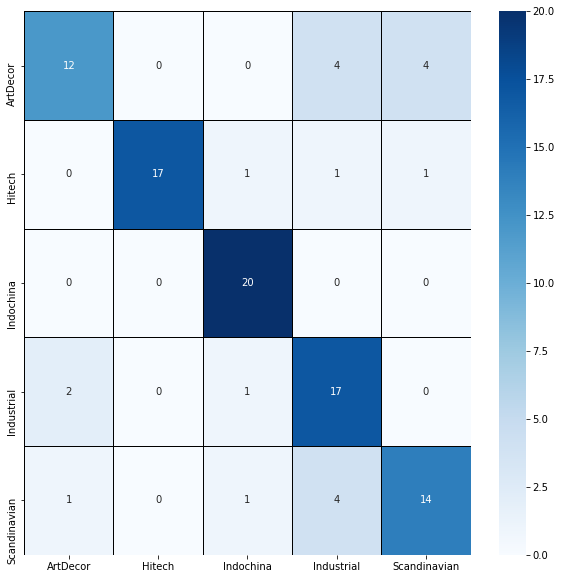

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(cm , index = labels , columns = labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm, cmap= "Blues", linecolor = 'black' , 
            linewidth = 1 , annot = True, fmt='' , 
            xticklabels = labels , yticklabels = labels)